In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, arange
from scipy import stats
%matplotlib inline




In [34]:
sqrt(9)

3.0

In [6]:
student= pd.read_csv('student_data.csv',sep=";")

In [7]:
student.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dbev,Wbev,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
student.shape

(649, 34)

In [14]:
student['beverage_index'] = (5* student['Dbev'] + 2*student['Wbev'])/7 

In [15]:
student['beverage_index']

0      1.000000
1      1.000000
2      2.285714
3      1.000000
4      1.285714
         ...   
644    1.285714
645    1.000000
646    1.000000
647    3.285714
648    3.285714
Name: beverage_index, Length: 649, dtype: float64

In [18]:
student['bev'] = student['beverage_index'] <= 2

In [19]:
student['bev']

0       True
1       True
2      False
3       True
4       True
       ...  
644     True
645     True
646     True
647    False
648    False
Name: bev, Length: 649, dtype: bool

In [20]:
student['bev'] =student['bev'].map({True:'Low',False:'High'})

In [49]:
student['bev']

0       Low
1       Low
2      High
3       Low
4       Low
       ... 
644     Low
645     Low
646     Low
647    High
648    High
Name: bev, Length: 649, dtype: object

In [ ]:
#confidence Interval
#Central limit Theorem

# To get the confidence interval for the mean we need three numbers:

  #  1. Sample mean
  #  2. Standard error
  #  3. Confidence level
    
    #formula = s/sqrt(sample_size)
    
    

In [21]:
sample_size=student.shape[0]
print(sample_size)

649


In [22]:
sample_mean_grade =student['G3'].mean()
sample_mean_grade

11.906009244992296

In [24]:
std_error_grades = student['G3'].std()/sqrt(sample_size)

In [25]:
std_error_grades

0.126814350307949

In [26]:
stats.norm.interval(0.95, loc=sample_mean_grade, scale=std_error_grades)

(11.65745768566587, 12.154560804318722)

In [ ]:
# "Does beverage consumption affect Academic performance?"


#Null Hypothesis
#Alternative Hypothesis

#steps:

#1 Signficance level "alpha" 5% or 0.05  OR 0.1 or 0.01 or 10%
#2 p-value  - compare this value with alpha value
#3 reject or accept the hypothesis
#4 final implication of results to original question.

#statistical test


In [42]:
grades_low_bev= student['G3'][student['bev']=='Low']
grades_high_bev = student['G3'][student['bev']=='High']

In [44]:
stats.bartlett(grades_low_bev,grades_high_bev)

BartlettResult(statistic=1.1025085913378183, pvalue=0.29371623181175127)

<AxesSubplot:xlabel='bev', ylabel='G3'>

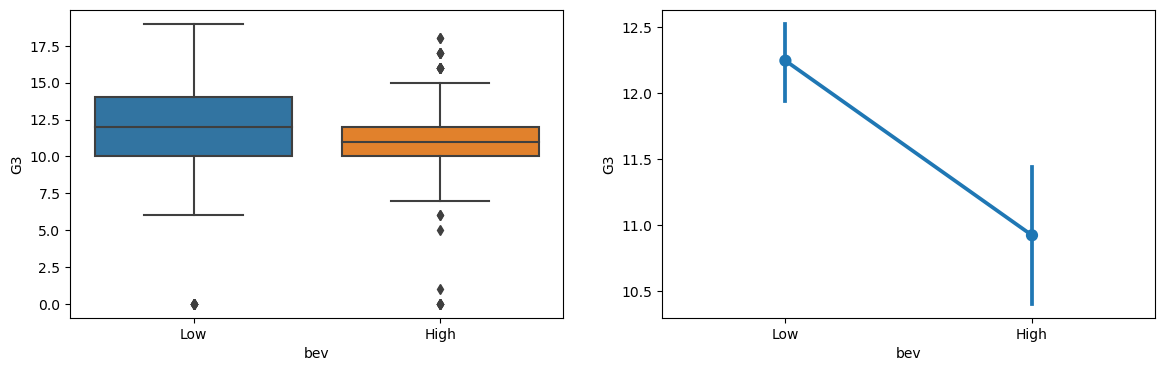

In [49]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
sns.boxplot(x='bev',y='G3', data =student, ax=axes[0])
sns.pointplot(x='bev',y='G3', data =student, ax=axes[1])

In [50]:
#Null Hypothesis - the population means of the final grades are equal
#alternative Hypothesis - the population means of the final grades are different

stats.ttest_ind(grades_low_bev, grades_high_bev, equal_var=True)

Ttest_indResult(statistic=4.621320706949354, pvalue=4.603608830369269e-06)

In [ ]:

# there is a statistically significant difference between the grades of the two analyzed groups. 
#Since the mean for the group with high beverage consumption is less than the mean for the other group,
#the results suggest that beverage consumption has a negative impact on the students' academic performance.